# Questão 1

In [8]:
from scipy.integrate import quad
import scipy.constants as sc
import numpy as np
import matplotlib.pyplot as plt

T=2.725
H_0=60/3.086e19 #em segundos
omega_rad=(32*sc.pi*sc.G*sc.sigma*(T**4))/(3*((H_0)**2)*(sc.c**3))
omega_m=0.3
omega_l=0.6
omega_k=1-omega_rad-omega_l-omega_m

# Letra b:
def idade_universo_int(z):
    materia=omega_m*((1+z)**3)
    radiacao=omega_rad*((1+z)**4)
    energia_escura=(omega_l/512)*(((2+z)**9)/((1+z)**6))
    curvatura=omega_k*((1+z)**2)
    Ez=np.sqrt(materia+radiacao+energia_escura+curvatura)
    return 1/((1+z)*Ez)

idade=(1/H_0)*(quad(idade_universo_int, 0, np.inf))[0] #em segundos
idade_ganos=idade/(3600*24*365*1e9) # em giganos
print(f"Letra (B): Este universo tem {idade_ganos:.2f} Ganos em z=0")

# Letra c:

def distancia_comovel_int(z):
    materia=omega_m*((1+z)**3)
    radiacao=omega_rad*((1+z)**4)
    energia_escura=(omega_l/512)*(((2+z)**9)/((1+z)**6))
    curvatura=omega_k*((1+z)**2)
    Ez=np.sqrt(materia+radiacao+energia_escura+curvatura)
    return 1/Ez

distancia_comovel=(sc.c/H_0)*quad(distancia_comovel_int, 0, 16)[0] #em metros
#Seguindo a referência do Capellini:
if(omega_k == 0): distancia_comovel = distancia_comovel #distancia comóvel segue inalterada
elif(omega_k > 0): distancia_comovel = (sc.c/H_0)*(1/np.sqrt(omega_k))*np.sinh(np.sqrt(omega_k)*(distancia_comovel/(sc.c/H_0)))
else: distancia_comovel = (sc.c/H_0)*(1/np.sqrt(abs(omega_k)))*np.sin(np.sqrt(abs(omega_k))*(distancia_comovel/(sc.c/H_0)))
diametro_angular=distancia_comovel/(1+16) #em metros, onde z=16
resol_telesco=0.05*(sc.pi/(180*3600)) #em radianos
# Como resol_telesco << 1 radiano, podemos usar R=alpha*d_A, logo:
tam_fisico=resol_telesco*diametro_angular/3.08e16 #em parsec
print(f"Letra (C): O tamanho físico que podemos resolver com este telescópio é {tam_fisico:.5f} parsec em z=16")

# Letra d:

idade=(1/H_0)*(quad(idade_universo_int, 16, np.inf))[0] #em segundos
idade_ganos=idade/(3600*24*365*1e9) # em giganos
print(f"Letra (D): Este universo tem {idade_ganos:.3f} Ganos em z=16")

# Letra e:

distancia_comovel=(sc.c/H_0)*quad(distancia_comovel_int, -1, np.inf)[0] #em metros
distancia_horizonte=distancia_comovel/3.085e25
print(f"Letra (E): A distância horizonte é {distancia_horizonte:.3f} Gpc")


Letra (B): Este universo tem 15.73 Ganos em z=0
Letra (C): O tamanho físico que podemos resolver com este telescópio é 187.34867 parsec em z=16
Letra (D): Este universo tem 0.279 Ganos em z=16
Letra (E): A distância horizonte é 18.787 Gpc


/tmp/ipykernel_439913/2778270190.py:8: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  for i in z: idade.append((1/H_0)*(quad(idade_universo_int, i, np.inf))[0])
/tmp/ipykernel_439913/2778270190.py:4: RuntimeWarning: divide by zero encountered in divide
  def pho_de (z): return (omega_l/512)*(((2+z)**9)/((1+z)**6))


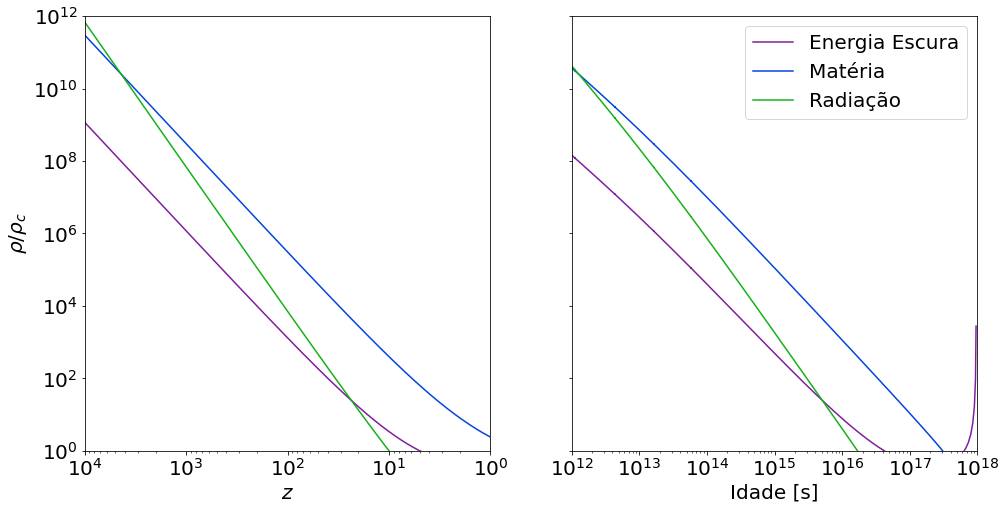

In [16]:
# Letra f:

z=np.arange(-1, 1e5, 0.1)
def pho_de (z): return (omega_l/512)*(((2+z)**9)/((1+z)**6))
def pho_m (z): return omega_m*((1+z)**3)
def pho_rad (z): return omega_rad*((1+z)**4)
idade=[]
for i in z: idade.append((1/H_0)*(quad(idade_universo_int, i, np.inf))[0])

fig, axs = plt.subplots(1, 2, figsize=(16,8), sharey=True)
axs[0].plot(z, pho_de(z), label='Energia Escura', linewidth=1.5, color='xkcd:purple')
axs[0].plot(z, pho_m(z), label='Matéria', linewidth=1.5, color='xkcd:blue')
axs[0].plot(z, pho_rad(z), label='Radiação', linewidth=1.5, color='xkcd:green')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_ylim([1, 1e12])
axs[0].set_xlim([1, 1e4])
axs[0].invert_xaxis()
axs[0].set_xlabel(r'$z$', size=20)
axs[0].set_ylabel(r'$\rho$/$\rho_c$', size=20)
axs[0].tick_params(axis='both', labelsize=20)

axs[1].plot(idade, pho_de(z), label='Energia Escura', linewidth=1.5, color='xkcd:purple')
axs[1].plot(idade, pho_m(z), label='Matéria', linewidth=1.5, color='xkcd:blue')
axs[1].plot(idade, pho_rad(z), label='Radiação', linewidth=1.5, color='xkcd:green')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel(r'Idade [s]', size=20)
axs[1].set_xlim([1e12, 1e18])
axs[1].tick_params(axis='both', labelsize=20)
plt.legend(fontsize=20)
plt.savefig('densidades.png', dpi=200, facecolor='w', edgecolor='w', bbox_inches='tight')

# Questão 2

In [55]:
import scipy.special

# Letra a e b:
T=2.7255
H_0=70/3.086e19 #em segundos
def fotons(T): return  (2*sc.pi*scipy.special.zeta(3)*(2*sc.k*2.725/(sc.c*sc.h))**3)*(T/2.725)**3 #metros cúbicos na menos 1
rho=((3*(H_0**2))/(8*sc.pi*sc.G))
barions=rho/sc.m_p
print(barions/fotons(T)) #em termos de omega_b e h_70**2

# Letra b:
print(fotons(T)/1e6) #centimetros cubicos na menos 1

1.3394577832768022e-08
410.72684792484506
